In [ ]:
!pip install openpyxl # installing the correct library

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import display
#importing the needed libraries

In [ ]:
try:
    Data = pd.read_excel("/content/UoW Data 2024_25.xlsx", sheet_name=1)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")
#reading the correct excel sheet

In [ ]:
Data.head() #getting an idea for the layoout of the dataset

,Timestamp,Ethnicity,Nationality,No Of Dependents / Children,Shoe Size (UK) \nPlease enter a UK shoe size.,What are the shoes needed for?,Employment Status,Do you receive Universal Credit?,Are you in education or training?,Are you a looked after child or care leaver?,Have you recently been released from prison? (in the last 6 months),Are you seeking asylum in the UK? (Refugee),"Do you have a youth or social worker, youth offending or probation officer?",Where did you hear about Resole?
0,NOTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,White,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2025-06-05 00:00:00,NaN,Homeless,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-08-14 00:00:00,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Data.info() #getting an idea for the column names and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Timestamp                                                                     132 non-null    object
 1   Ethnicity                                                                     115 non-null    object
 2   Nationality                                                                   112 non-null    object
 3   No Of Dependents / Children                                                   100 non-null    object
 4   Shoe Size (UK) 
Please enter a UK shoe size.                                  195 non-null    object
 5   What are the shoes needed for?                                                114 non-null    object
 6   Employment Status                         

In [ ]:
Data.columns = Data.columns.str.strip() #removing any trailing whitespace

In [ ]:
Data = Data.drop(columns=['Ethnicity', 'Nationality', 'No Of Dependents / Children','What are the shoes needed for?',
                          'Do you receive Universal Credit?','Are you in education or training?',
                          'Are you a looked after child or care leaver?','Have you recently been released from prison? (in the last 6 months)',
                          'Do you have a youth or social worker, youth offending or probation officer?',
                          'Where did you hear about Resole?'])
#dropping the specified columns

In [ ]:
Data['Shoe Size (UK) \nPlease enter a UK shoe size.'].describe() #attempting to get the descriptive statistics for shoe size

,Shoe Size (UK) \nPlease enter a UK shoe size.
count,195
unique,72
top,8
freq,22


In [ ]:
Data.rename(columns={'Shoe Size (UK) \nPlease enter a UK shoe size.': 'Shoe size'}, inplace=True) #renaming the column to make it simpler

In [ ]:
Data.dropna(subset=['Shoe size'], inplace=True) #dropping null values from the shoe size column

In [ ]:
Data.isnull().sum() #checking to see if the value dropping worked

,0
Timestamp,65
Shoe size,0
Employment Status,55
Are you seeking asylum in the UK? (Refugee),81


In [ ]:
value_counts = Data['Shoe size'].value_counts()
print(value_counts)
#getting the count for each shoe size

Shoe size
8                 22
7                 20
9                 19
11                12
5                 12
                  ..
UK 5 (women’s)     1
7 UK (men's)       1
43                 1
06                 1
10,11              1
Name: count, Length: 72, dtype: int64


In [ ]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
pd.options.display.width = 150

print(value_counts)
#previous count was truncated, the display values had to be changed

Shoe size
8                                                  22
7                                                  20
9                                                  19
11                                                 12
5                                                  12
4                                                  10
6                                                   8
3                                                   5
10                                                  5
12                                                  4
41                                                  4
9.5                                                 4
5.5                                                 3
6.5 or 7                                            3
13                                                  2
8.5                                                 2
44                                                  2
37                                                  2
7.5               

In [ ]:
Data['Shoe size'] = Data['Shoe size'].astype(str).str.strip() #converting all values to string

In [ ]:

Data['Shoe size'] = Data['Shoe size'].map({'6.5 or 7': 6.5, '41': 6.5, '44': 9, '37': 3, '42': 7.5,'8.5 and 9.5':9,
                                           '7,5——-1——11 kids':'7,5,1,11','Kids 10':10,'10 - 3.5':'10,3.5','10-11':10.5,'11 & 13':'11,13',
                                           '4 5':4.5,
                                           '10, and 7.5 and 6 and 3 and 5':'10,7.5,6,3,5','11 ,8,   Adult':'11,8','UK 7 / 42':7,'8 Adult wide':8,'UK 4':4,
                                           '35':2.5,'UK 11':11,'9.5 male':9.5,'Size 8.5 infant Size uk 3 and size 12.5 infant':3,
                                           'UK 12, EU - 46':12,"40 EU (women's)":5,'4-5 adult women':3.5,
                                           '2025-05-04 00:00:00':'NA','2025-06-06 00:00:00':'NA','12/13':12.5,'10/10.5':10.5,'8/8.5':8.5,'39':5,
                                           '7or 7.5':7.5,'9 / 9.5':9.5,'10.5, 9.5 ,6.5.':'10.5, 9.5 ,6.5','Eu43':8,'43 EU / 8 UK':8,'6/30--7':6.5,'Uk 7':7,
                                           '9.5  or 10 UK size':10,'size 1':1,'8 UK (male)':8,"Women's 8":6.5,"UK 5 (women’s)":3.5,"7 UK (men's)":7,
                                           '43':8,'06':6}).fillna(Data['Shoe size'])
#mapping all the values correctly to a singular size

In [ ]:
value_counts2 = Data['Shoe size'].value_counts()
print(value_counts2)
#second value count to check

Shoe size
8                                           22
7                                           20
9                                           19
11                                          12
5                                           12
4                                           10
6.5                                          9
6                                            8
10                                           5
3                                            5
8                                            5
9.5                                          4
12                                           4
9                                            3
3                                            3
7.5                                          3
7                                            3
5.5                                          3
5                                            2
9.5                                          2
8.5                                          2
3.5

In [ ]:
Data['Shoe size'] = Data['Shoe size'].map({'UK 8/9 EU 42/43':8.5,'Sizes, 10, 11.5, 12.5, 13.5, and 5 adult':'10,11.5,12.5,13.5,5','2025-06-05 00:00:00':'NA'
                                           }).fillna(Data['Shoe size'])
#mapping all the remaining values that didn't get mapped at first

All shoe sizes converted to male UK equivelant and in the case of "8/9" 8.5 was encoded and in the case of "8/8.5" 8.5 was encoded to make sure the shoe is not too tight for the individual.

In [ ]:
Data = Data[Data['Shoe size'] != 'NA'] #dropping NA values from shoe sizes

In [ ]:
value_counts4 = Data['Shoe size'].value_counts()
print(value_counts4)
#third value count to check

Shoe size
8                      22
7                      20
9                      19
5                      12
11                     12
4                      10
6.5                     9
6                       8
10                      5
8                       5
3                       5
12                      4
9.5                     4
7.5                     3
7                       3
3                       3
9                       3
5.5                     3
8.5                     2
8.5                     2
9.5                     2
10                      2
13                      2
10.5                    2
7.5                     2
5                       2
3.5                     2
4.5                     1
3.5                     1
11                      1
11.5                    1
10-10.5                 1
2.5                     1
9,5                     1
4                       1
11,8                    1
10,7.5,6,3,5            1
10,11.5,12.5,13.5,5     1
11

In [ ]:
Data['Shoe size'] = Data['Shoe size'].map({'10-10.5':10.5
                                           }).fillna(Data['Shoe size'])
#third mapping

In [ ]:
value_counts5 = Data['Shoe size'].value_counts()
print(value_counts5)

print("\nTotal count:", value_counts5.sum())
#fourth value count to check for errors


Shoe size
8                      22
7                      20
9                      19
5                      12
11                     12
4                      10
6.5                     9
6                       8
10                      5
8                       5
3                       5
12                      4
9.5                     4
7.5                     3
7                       3
3                       3
9                       3
5.5                     3
10.5                    3
8.5                     2
8.5                     2
9.5                     2
10                      2
13                      2
7.5                     2
5                       2
3.5                     2
11,13                   1
4.5                     1
3.5                     1
11                      1
11.5                    1
2.5                     1
9,5                     1
4                       1
11,8                    1
10,7.5,6,3,5            1
10,11.5,12.5,13.5,5     1
10

In [ ]:
Data.loc[:, 'Shoe size'] = Data['Shoe size'].astype(str).str.replace(r'\s+', '', regex=True)

Data.loc[:, 'Shoe size'] = Data['Shoe size'].str.split(',')

Data = Data.explode('Shoe size')

print(Data['Shoe size'].value_counts())
print("\nTotal count after exploding:", len(Data))

#converting data to string and removing whitespace
#making sure multiple values in a cell are split with a comma
#exploding these multiple values from one cell into singular values across multiple cells
#total value count

Shoe size
8       29
7       25
9       24
11      18
5       18
10      13
4       11
6       10
6.5     10
3        9
9.5      8
7.5      7
12       6
10.5     5
8.5      4
13       4
3.5      4
5.5      3
1        3
12.5     2
11.5     2
13.5     1
2.5      1
4.5      1
Name: count, dtype: int64

Total count after exploding: 218


In [ ]:
Data['Shoe size'] = Data['Shoe size'].astype(float) #converting shoe sizes to float for visualisation

In [ ]:
value_counts6 = Data['Shoe size'].value_counts()
print(value_counts6)

print("\nTotal count:", value_counts6.sum())
#value count to check if float conversion was successful

Shoe size
8.0     29
7.0     25
9.0     24
11.0    18
5.0     18
10.0    13
4.0     11
6.0     10
6.5     10
3.0      9
9.5      8
7.5      7
12.0     6
10.5     5
8.5      4
13.0     4
3.5      4
5.5      3
1.0      3
12.5     2
11.5     2
13.5     1
2.5      1
4.5      1
Name: count, dtype: int64

Total count: 218


In [ ]:
Data['Shoe size'].describe() #univariate analysis/descriptive statistics for shoe size column

,Shoe size
count,218.000000
mean,7.697248
std,2.630045
min,1.000000
25%,6.000000
50%,8.000000
75%,9.500000
max,13.500000


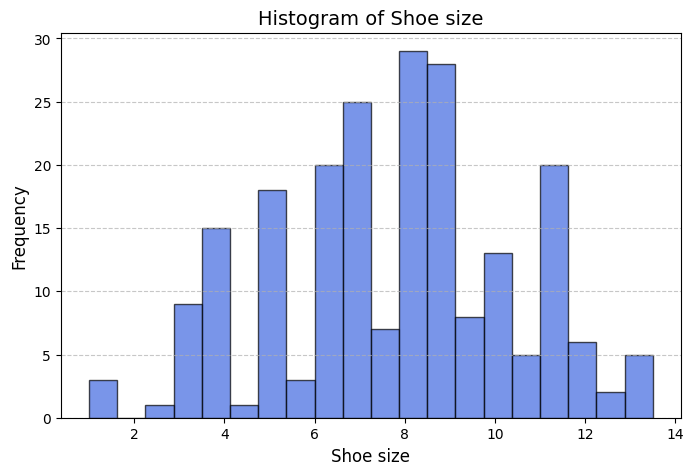

In [ ]:
column = 'Shoe size'

plt.figure(figsize=(8, 5))
plt.hist(Data[column], bins=20, color='royalblue', edgecolor='black', alpha=0.7)

plt.xlabel(column, fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Histogram of {column}', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Shoe sizes against frequancy shows a normal distribution pattern, with size 8 being the most frequant.

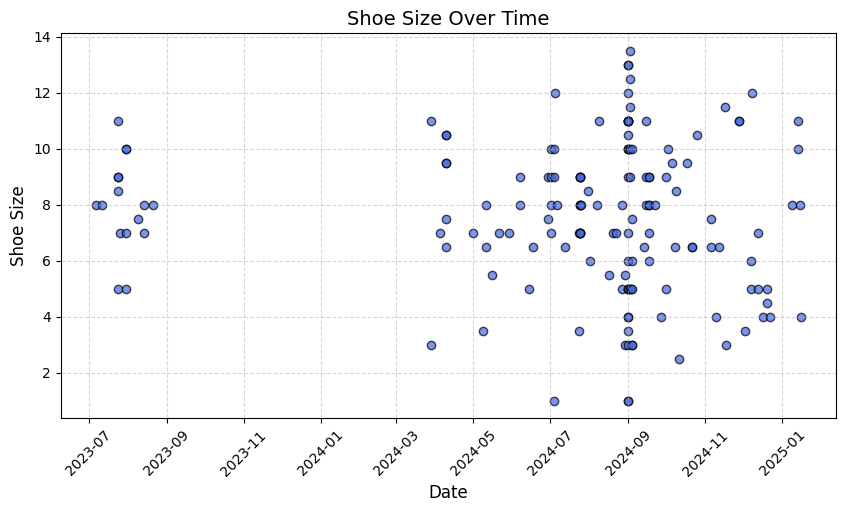

In [ ]:
Data['Timestamp'] = pd.to_datetime(Data['Timestamp'])

x_column = 'Timestamp'
y_column = 'Shoe size'

plt.figure(figsize=(10, 5))
plt.scatter(Data[x_column], Data[y_column], color='royalblue', alpha=0.7, edgecolor='black')


plt.xlabel('Date', fontsize=12)
plt.ylabel('Shoe Size', fontsize=12)
plt.title('Shoe Size Over Time', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()
#converting Timestamp to correct format for scatterplot
#defining my columns
#creating and showing scatterplot

In [ ]:
Data['Are you seeking asylum in the UK? (Refugee)'] = Data['Are you seeking asylum in the UK? (Refugee)'].str.strip()
Data['Are you seeking asylum in the UK? (Refugee)'] = Data['Are you seeking asylum in the UK? (Refugee)'].str.lower()
#removing trailing whitespace and converting column to lowercase

In [ ]:
Data['Are you seeking asylum in the UK? (Refugee)'].unique() #checking for unique values in the column

array([nan, 'victim of trafficking/modern slavery (nrm)', 'yes', 'no',
       'asylum seeker', 'refugee', 'i am seeking assylum in the uk',
       'refugee status (5 years)'], dtype=object)

In [ ]:
Data['Are you seeking asylum in the UK? (Refugee)'] = Data['Are you seeking asylum in the UK? (Refugee)'].replace({'victim of trafficking/modern slavery (nrm)': 'Yes', 'asylum seeker': 'Yes',
                                                                                                               'refugee': 'Yes', 'i am seeking assylum in the uk': 'Yes', 'refugee status (5 years)': 'Yes',
                                                                                                               'yes': 'Yes', 'no': 'No'})
#mapping those unique values to either yes or no

In [ ]:
value_countsR = Data['Are you seeking asylum in the UK? (Refugee)'].value_counts()
print(value_countsR)

print("\nTotal count:", value_countsR.sum())
#value count to see how many of the people requesting shoes are also seeking asylum

Are you seeking asylum in the UK? (Refugee)
No     71
Yes    69
Name: count, dtype: int64

Total count: 140


In [ ]:
try:
    Gov = pd.read_excel("/content/asylum-applications-awaiting-decision-datasets-mar-2023.xlsx", sheet_name=4)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")
#loading government dataset on asylum seeker applications

In [ ]:
Gov.head(15) #checking the layout of the dataset

,"Asylum applications awaiting a decision, 2010 Q2 to 2023 Q1",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Region,(All),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nationality,(All),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Applicant type,Main Applicant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sum of Applications,Column Labels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Row Labels,31 Mar 2020,30 Jun 2020,30 Sep 2020,31 Dec 2020,31 Mar 2021,30 Jun 2021,30 Sep 2021,31 Dec 2021,31 Mar 2022,30 Jun 2022,30 Sep 2022,31 Dec 2022,31 Mar 2023
6,Pending initial decision,40830,42653,48054,51321,52467,56617,67547,81978,89344,99419,117400,132182,133607
7,6 months or less,16300,12309,11961,14642,13215,14411,23529,33298,30529,26822,38086,43253,34868
8,More than 6 months,24530,30344,36093,36679,39252,42206,44018,48680,58815,72597,79314,88929,98739
9,Pending further review,1381,1798,2125,3812,2506,1357,3261,3279,3737,3664,3907,4051,0


In [ ]:
Gov_transposed = Gov.T #transposing the gov dataset

In [ ]:
Gov_transposed.head() #checking if the dataset got transposed correctly

,0,1,2,3,4,5,6,7,8,9,10,11
"Asylum applications awaiting a decision, 2010 Q2 to 2023 Q1",Region,Nationality,Applicant type,NaN,Sum of Applications,Row Labels,Pending initial decision,6 months or less,More than 6 months,Pending further review,N/A - Further review,Grand Total
Unnamed: 1,(All),(All),Main Applicant,NaN,Column Labels,31 Mar 2020,40830,16300,24530,1381,1381,42211
Unnamed: 2,NaN,NaN,NaN,NaN,NaN,30 Jun 2020,42653,12309,30344,1798,1798,44451
Unnamed: 3,NaN,NaN,NaN,NaN,NaN,30 Sep 2020,48054,11961,36093,2125,2125,50179
Unnamed: 4,NaN,NaN,NaN,NaN,NaN,31 Dec 2020,51321,14642,36679,3812,3812,55133


In [ ]:
Gov_transposed.columns #checking for column names after transposing


RangeIndex(start=0, stop=12, step=1)

In [ ]:
Gov_transposed = Gov.T
Gov_transposed.columns = Gov_transposed.iloc[0]
Gov_transposed = Gov_transposed[1:]
#fixing the column names by setting the header to the first row and removing the previous header row

In [ ]:
Gov_transposed.head() #checking the layout

"Asylum applications awaiting a decision, 2010 Q2 to 2023 Q1",Region,Nationality,Applicant type,NaN,Sum of Applications,Row Labels,Pending initial decision,6 months or less,More than 6 months,Pending further review,N/A - Further review,Grand Total
Unnamed: 1,(All),(All),Main Applicant,NaN,Column Labels,31 Mar 2020,40830,16300,24530,1381,1381,42211
Unnamed: 2,NaN,NaN,NaN,NaN,NaN,30 Jun 2020,42653,12309,30344,1798,1798,44451
Unnamed: 3,NaN,NaN,NaN,NaN,NaN,30 Sep 2020,48054,11961,36093,2125,2125,50179
Unnamed: 4,NaN,NaN,NaN,NaN,NaN,31 Dec 2020,51321,14642,36679,3812,3812,55133
Unnamed: 5,NaN,NaN,NaN,NaN,NaN,31 Mar 2021,52467,13215,39252,2506,2506,54973


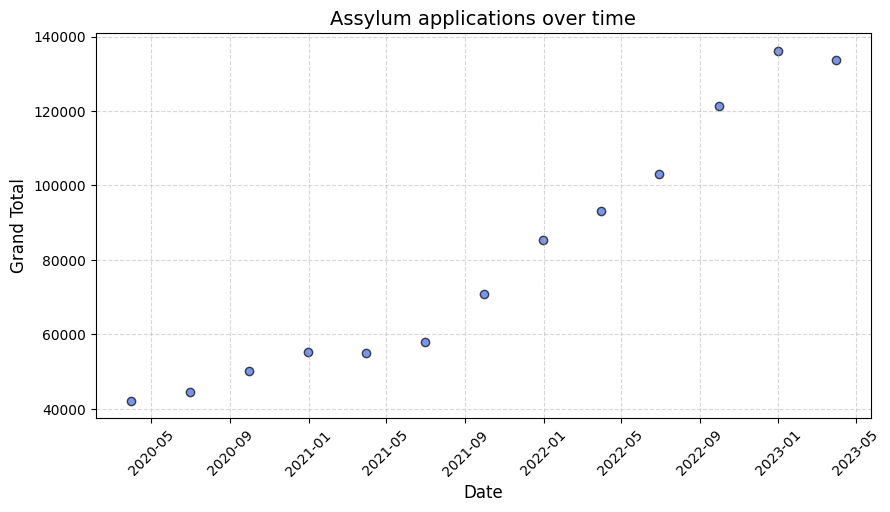

In [ ]:
Gov_transposed['Row Labels'] = pd.to_datetime(Gov_transposed['Row Labels'])

x_column = 'Row Labels'
y_column = 'Grand Total'

plt.figure(figsize=(10, 5))
plt.scatter(Gov_transposed[x_column], Gov_transposed[y_column], color='royalblue', alpha=0.7, edgecolor='black')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Grand Total', fontsize=12)
plt.title('Asylum applications over time', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()
#creating scatterplot for asylum seeker applications against time starting from 2020

Our data shows us that, there is quite an even split between non asylum seekers and asylum seekers making requests. We worked under the assumption that the data for shoe requests will follow the same trend as total asylum seekers in the uk (Dataset sourced from the government).

After analysing the total number of asylum seekers in the uk from 2020 onwards, we can see a clear upwards trend, using our assumption as stated previously, we can infer that demand for shoes from resole will increase.

In [ ]:
#Reading the Stock Provision Excel sheet into Colab Notebook
try:
    Data1 = pd.read_excel("/content/UoW Data 2024_25.xlsx", sheet_name=0)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
#Checking the correct sheet has been added
Data1.head()

,Partner,Amount of pairs,Date
0,Brixton Soup Kitchen,50,Jan-Feb 2024
1,Brixton Soup Kitchen,30,Spring 2024
2,Brixton Soup Kitchen,30,Summer 2024
3,Care 4 Calaris,60,Winter 2024


Assuming Resole supplies another 50 shoes to Brixton Soup Kitchen between January and February 2025, the amount of stock provided to partners in a year will be 220.

In [ ]:
#Reading the Incoming Shoes from Brand/Partners Donors data
try:
    Data3 = pd.read_excel("/content/UoW Data 2024_25.xlsx", sheet_name=2)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
#Checking the correct sheet has been assigned to Data3
Data3.head(6)

,Brand/Partners donors,Amount of shoes,Shoe brand,New/Used/NearlyNew,Date/Year
0,Nike,40,NIKE,New,2024-02-01 00:00:00
1,Hope and Glory/ Sneaker school,40,High street stores: Topshop/Zara/NewLook white...,New,2025-01-01 00:00:00
2,ITV,50,High street brands,New,2024-01-01 00:00:00
3,StockX,40,"Jordan's NIke, Addias",New,2024-10-01 00:00:00
4,Sole Suppliers,10,Nike and Addias.,Nearly new,2024-05-01 00:00:00
5,Alex Arrogato,50,AA,Defect,Not known


170 New Shoes (No Cleaning), 10 Nearly New Shoes (Minimal Cleaning), 50 Defect Shoes (Recycling Needed)

Yearly Total: 230

In [ ]:
#Reading the Incoming Shoes from Shoe Drives dataset
try:
    Data4 = pd.read_excel("/content/UoW Data 2024_25.xlsx", sheet_name=3)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
#Checking the correct sheet has been assigned to Data4
Data4.head(7)

,Shoe Drive (ByWho/Where),Amount of shoes,New/Used/NearlyNew
0,"Lush Shoe Drive: Collected around 100 pairs, f...",100,Pre-loved/Used
1,Share Max Shoe Drive: Over 100 pairs donated d...,100,Pre-loved/Used
2,Sole Suppliers: Supporters donated three shopp...,10,Pre-loved/Used
3,"Capgemini Shoe Drive: Collected 110 pairs, inc...",110,Pre-loved/Used
4,Family Shoe Drives: Supporters contributed sma...,50,Pre-loved/Used
5,Kruz Music artist:,40,Pre-loved/Used
6,"School students campaign,",100,Pre-loved/Used


Pre-Loved/Used Shoes will need the estimated 2-3 hours cleaning time before being ready for redistribution.

Yearly Total: 510

In [ ]:
#Combining datasets
frames = [Data3, Data4]
CombData = pd.concat(frames)
CombData.head(10)

,Brand/Partners donors,Amount of shoes,Shoe brand,New/Used/NearlyNew,Date/Year,Shoe Drive (ByWho/Where)
0,Nike,40,NIKE,New,2024-02-01 00:00:00,NaN
1,Hope and Glory/ Sneaker school,40,High street stores: Topshop/Zara/NewLook white...,New,2025-01-01 00:00:00,NaN
2,ITV,50,High street brands,New,2024-01-01 00:00:00,NaN
3,StockX,40,"Jordan's NIke, Addias",New,2024-10-01 00:00:00,NaN
4,Sole Suppliers,10,Nike and Addias.,Nearly new,2024-05-01 00:00:00,NaN
5,Alex Arrogato,50,AA,Defect,Not known,NaN
6,Converse,40,Converse,New,2024,NaN
0,NaN,100,NaN,Pre-loved/Used,NaN,"Lush Shoe Drive: Collected around 100 pairs, f..."
1,NaN,100,NaN,Pre-loved/Used,NaN,Share Max Shoe Drive: Over 100 pairs donated d...
2,NaN,10,NaN,Pre-loved/Used,NaN,Sole Suppliers: Supporters donated three shopp...


In [ ]:
#Renaming the combined condition column to make it more descriptive of the values inside
CombData = CombData.rename(columns={'New/Used/NearlyNew': 'Shoe Condition'})

In [ ]:
#Dropping Date/Year as all values are within the same year
#Dropping the Shoe Brand column as the specific shoe model makes very little difference in the cleaning process
CombData = CombData.drop(columns=['Date/Year', 'Shoe brand'])

In [ ]:
CombData

,Brand/Partners donors,Amount of shoes,Shoe Condition,Shoe Drive (ByWho/Where)
0,Nike,40,New,NaN
1,Hope and Glory/ Sneaker school,40,New,NaN
2,ITV,50,New,NaN
3,StockX,40,New,NaN
4,Sole Suppliers,10,Nearly new,NaN
5,Alex Arrogato,50,Defect,NaN
6,Converse,40,New,NaN
0,NaN,100,Pre-loved/Used,"Lush Shoe Drive: Collected around 100 pairs, f..."
1,NaN,100,Pre-loved/Used,Share Max Shoe Drive: Over 100 pairs donated d...
2,NaN,10,Pre-loved/Used,Sole Suppliers: Supporters donated three shopp...


In [ ]:
#Creating a new column 'Source' to categorise where the shoes are coming from
CombData["Source"] = CombData.apply(lambda row: "Brand/Partner Donor" if pd.notna(row["Brand/Partners donors"])
                        else ("Shoe Drive" if pd.notna(row["Shoe Drive (ByWho/Where)"]) else None), axis=1)

In [ ]:
#Visualising the amount of shoes that are collected from Brands/Partners compared to Shoe Drive events
source_bar = px.bar(CombData, x='Source', y='Amount of shoes')
source_bar.show()

In [ ]:
#Using assumptions of the cleaning cost of each individual shoe, with low numbers as Resole most likely receives free cleaning products from Crep Protect
cleaning_cost_mapping = {
    'New': 0,
    'Defect': 0,
    'Nearly new': 1,
    'Pre-loved/Used': 5
}

CombData['Cleaning Cost Per Shoe'] = CombData['Shoe Condition'].map(cleaning_cost_mapping)

In [ ]:
#Using the estimation given to us by the Resole representative, Pre-Loved/Used shoes will take approximately 2 and a half hours to clean, and Nearly New shoes are being assumed
#to only take 30 mins
cleaning_time_mapping = {
    'New': 0,
    'Defect': 0,
    'Nearly new': 0.5,
    'Pre-loved/Used': 2.5
}

CombData['Cleaning Time Per Shoe'] = CombData['Shoe Condition'].map(cleaning_time_mapping)

In [ ]:
#Creating a dataframe to show minimum wages and eventually work out labour costs
#Contract types with assumptions made on contracted hours per week: full time (37.5), part time (22.5), weekend (15)
LabourData = [
    {'Category of Employee': '21 and Over'},
    {'Category of Employee': '18 to 20'},
    {'Category of Employee': 'Under 18'},
    {'Category of Employee': 'Volunteer'},
    {'Contract Type': 'Full Time'},
    {'Contract Type': 'Part Time'},
    {'Contract Type': 'Weekend'}
]
LabourData = pd.DataFrame(LabourData)

In [ ]:
#Mapping hourly labour costs according to upcoming April 2025 increase in National Minimum and Living Wage
labour_cost_mapping = {
    '21 and Over': 12.21,
    '18 to 20': 10,
    'Under 18': 7.55,
    'Volunteer': 0
}
LabourData['Minimum Hourly Labour Cost'] = LabourData['Category of Employee'].map(labour_cost_mapping)

In [ ]:
#Mapping the contracted hours per week to the type of contract
contract_hours_mapping = {
    'Full Time': 37.5,
    'Part Time': 22.5,
    'Weekend': 15
}
LabourData['Contracted Hours'] = LabourData['Contract Type'].map(contract_hours_mapping)

In [ ]:
LabourData

,Category of Employee,Contract Type,Minimum Hourly Labour Cost,Contracted Hours
0,21 and Over,NaN,12.21,NaN
1,18 to 20,NaN,10.00,NaN
2,Under 18,NaN,7.55,NaN
3,Volunteer,NaN,0.00,NaN
4,NaN,Full Time,NaN,37.5
5,NaN,Part Time,NaN,22.5
6,NaN,Weekend,NaN,15.0


To work out Storage Cost Per Shoe, I've used the conservative estimate of £100 per week for a 800 cubic foot storage unit at SafeStore in Clapham. The stackable shoe box container I chose to use was this one (https://www.amazon.co.uk/YITAHOME-Stackable-Containers-35-8x27-7x20-8cm-Organisers/dp/B08VNNFC7W?th=1). The boxes are easily stacked, with good quality plastic, a ventialtion system, and a durable door for easy access to the shoes, while fitting up to mens size 14 shoes.

Another assumption will be that the storage unit can only be filled 50% with shoes, as there needs to be space to access any of the shoes, and move around within the storage unit.

1 Box Dimensions : 1.175ft L x 0.9083333ft W x 0.683333ft H <= 400
0.72931559 cubic feet per box

400/0.72931559 = 548.45

548 boxes costing (548/12 * £72.99 per 12 boxes) = £3,336 <- Storage Set Up Cost

£100/week * 52 = £5,200 yearly storage cost (very conservative, could be a lot less with yearly storage)

£5,200 / 548 shoes stored (cyclical storage system)

=£9.489 to store a shoe for a year, / 12 = Monthly Storage Cost Per Shoe

Monthly Storage Cost Per Shoe = £0.79

In [ ]:
#From the previous text cell showing my working out for Monthly Storage Cost Per Shoe and adding it to the Combined Dataset
CombData['Monthly Storage Cost Per Shoe'] = 0.79

In [ ]:
CombData

,Brand/Partners donors,Amount of shoes,Shoe Condition,Shoe Drive (ByWho/Where),Source,Cleaning Cost Per Shoe,Cleaning Time Per Shoe,Monthly Storage Cost Per Shoe
0,Nike,40,New,NaN,Brand/Partner Donor,0,0.0,0.79
1,Hope and Glory/ Sneaker school,40,New,NaN,Brand/Partner Donor,0,0.0,0.79
2,ITV,50,New,NaN,Brand/Partner Donor,0,0.0,0.79
3,StockX,40,New,NaN,Brand/Partner Donor,0,0.0,0.79
4,Sole Suppliers,10,Nearly new,NaN,Brand/Partner Donor,1,0.5,0.79
5,Alex Arrogato,50,Defect,NaN,Brand/Partner Donor,0,0.0,0.79
6,Converse,40,New,NaN,Brand/Partner Donor,0,0.0,0.79
0,NaN,100,Pre-loved/Used,"Lush Shoe Drive: Collected around 100 pairs, f...",Shoe Drive,5,2.5,0.79
1,NaN,100,Pre-loved/Used,Share Max Shoe Drive: Over 100 pairs donated d...,Shoe Drive,5,2.5,0.79
2,NaN,10,Pre-loved/Used,Sole Suppliers: Supporters donated three shopp...,Shoe Drive,5,2.5,0.79
